In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import exists


In [3]:
source = '/Users/HQ/orange/Reza/abc/data/'
# systems = sorted([i for i in os.listdir(source) if '.' not in i])
# systems = ['1a74', '1azp', '1by4', '1bgb',  '2b0d', '1cdw', '1dh3', '1jj4', '1r4o', '1r4r', '1zme', '2dgc', '2r1j', '3cro', '1ysa', '2dgc']
seqs = sorted([i for i in os.listdir('/Users/HQ/orange/liweichang/ABC2021/production_phase/') if i.startswith('seq')])
bold = ['#fcff5d', '#7dfc00', '#0ec434', '#228c68', '#8ad8e8', '#235b54', '#29bdab', '#3998f5', '#37294f', '#277da7', '#3750db', '#f22020', '#991919', '#ffcba5', '#e68f66', '#c56133', '#96341c', '#632819', '#ffc413', '#f47a22', '#2f2aa0', '#b732cc', '#772b9d', '#f07cab', '#d30b94', '#edeff3', '#c3a5b4', '#946aa2', '#5d4c86', '#201923']
uf = ['#0021A5', '#F2A900', '#FA4616', '#22884C']

In [8]:
a = np.load(source+'seq144/bpsvnp.npy')
a.shape

(500000, 15, 9)

In [4]:
os.chdir(source+'seq143/')
# bpsv = np.genfromtxt('BPstep.values.dat', delimiter=' ')
bpsv = np.loadtxt('BPstep.values.dat', usecols=(3,4,5,6,7,8,9))
# bpsv = pd.read_csv('BPstep.values.dat', delim_whitespace=True)
bpsv.shape

(7500000, 7)

In [7]:
bends = []
r = bpsv.shape[0] #2000000
for i in range(r):
    bends.append(np.sqrt(np.square(bpsv[i][3])+np.square(bpsv[i][4])))

npbends = np.asarray(bends)
bpsvnp = np.c_[bpsv, npbends]
bpsvnp.shape
bpsvnp = np.reshape(bpsvnp, (500000, 15, 8))

total_bends = []
for i in range(bpsvnp.shape[0]):
    total_bends.append(sum(bpsvnp[i, :, 7]))
len(total_bends)

oneD_bends = []
for i in range(len(total_bends)):
    for j in range(15):
        oneD_bends.append(total_bends[i])

bpsvnp = np.c_[bpsv, npbends, oneD_bends]
bpsvnp = np.reshape(bpsvnp, (500000, 15, 9))
bpsvnp.shape

(500000, 15, 9)

In [17]:
bpsvnp = np.reshape(bpsvnp, (500000, 19, 8))

total_bends = []
for i in range(bpsvnp.shape[0]):
    total_bends.append(sum(bpsvnp[i, :, 7]))
len(total_bends)

oneD_bends = []
for i in range(len(total_bends)):
    for j in range(19):
        oneD_bends.append(total_bends[i])

bpsvnp = np.c_[bpsv, npbends, oneD_bends]
bpsvnp = np.reshape(bpsvnp, (500000, 19, 9))
bpsvnp.shape

(500000, 19, 9)

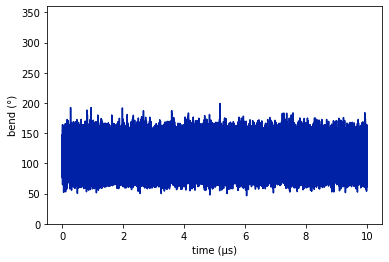

In [38]:
# plt.plot(bpsvnp[:, 0, 8])
plt.plot(np.arange(0, 10, 0.00002), a[:, 0, 8], color=uf[0])
plt.ylabel('bend (°)')
plt.ylim(0, 360)
plt.xlabel('time (μs)')
plt.savefig('total-bend.png', dpi=300, bbox_inches='tight')

In [32]:
np.arange(0, 10, 0.5).shape

(1,)

In [26]:
os.chdir(source+'seq143/')
sequence = open('sequence.dat').readlines()[0]

[Text(0, 0, 'G'),
 Text(1, 0, 'C'),
 Text(2, 0, 'G'),
 Text(3, 0, 'T'),
 Text(4, 0, 'G'),
 Text(5, 0, 'T'),
 Text(6, 0, 'G'),
 Text(7, 0, 'C'),
 Text(8, 0, 'A'),
 Text(9, 0, 'A'),
 Text(10, 0, 'C'),
 Text(11, 0, 'G'),
 Text(12, 0, 'G'),
 Text(13, 0, 'C'),
 Text(14, 0, 'A'),
 Text(15, 0, 'C'),
 Text(16, 0, 'G'),
 Text(17, 0, 'A'),
 Text(18, 0, 'G'),
 Text(19, 0, 'C')]

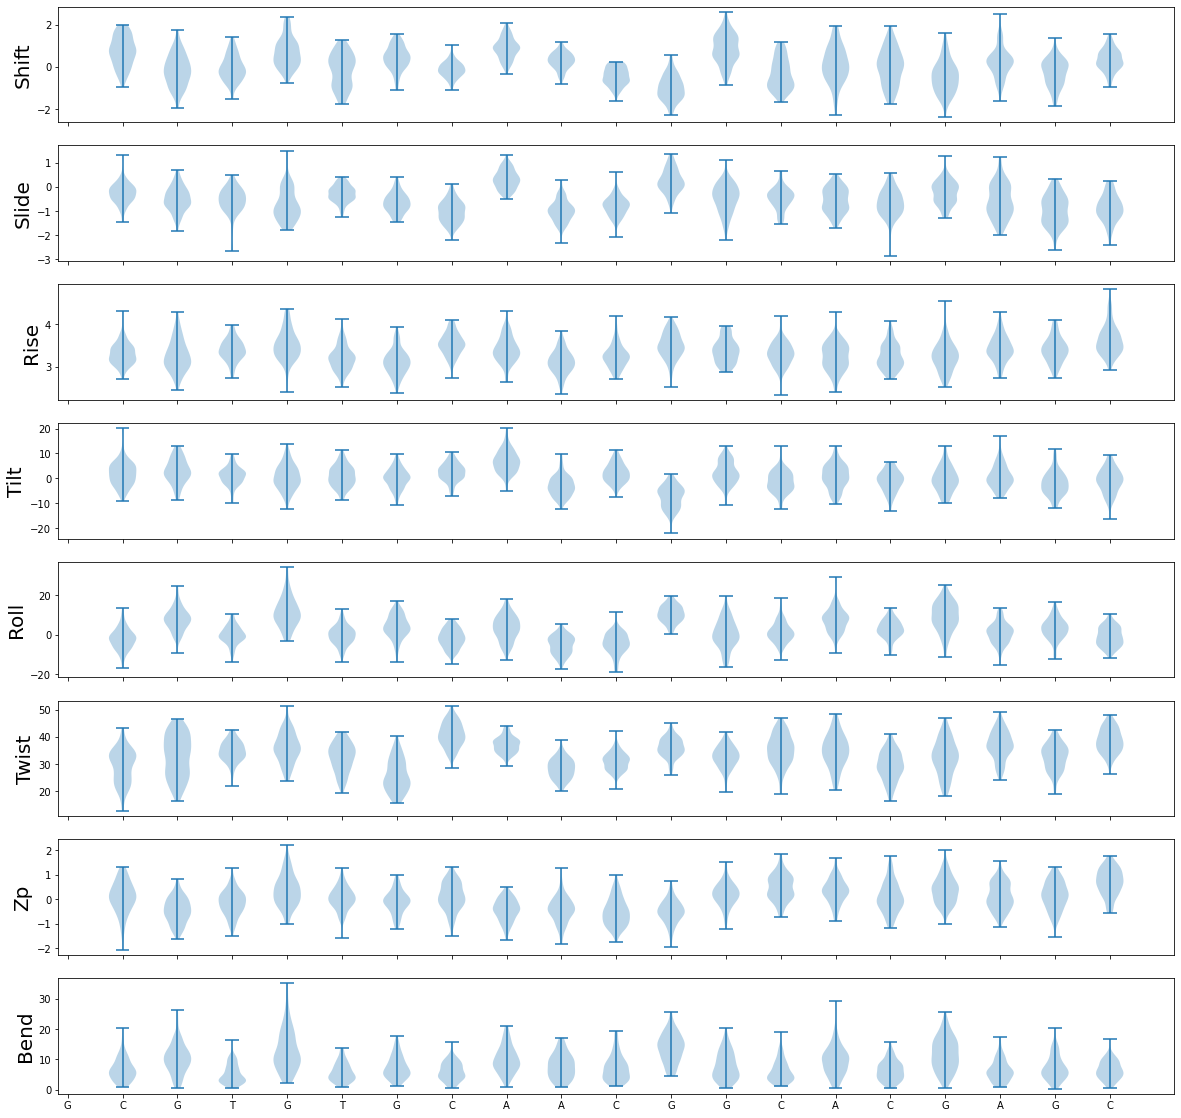

In [29]:
parameters = ['Shift', 'Slide', 'Rise', 'Tilt', 'Roll', 'Twist', 'Zp', 'Bend', 'Total Bend']
figs, axes = plt.subplots(8, 1, sharex=True, figsize=(20, 20))
for p in range(8):
    axes[p].violinplot(bpsvnp[:100, :, p])
    axes[p].set_ylabel(parameters[p], fontsize=20)
# axes[1].violinplot(bpsvnp[:10, :, 2])
axes[-1].set_xticks([i for i in range(20)])
axes[-1].set_xticklabels([i for i in sequence])

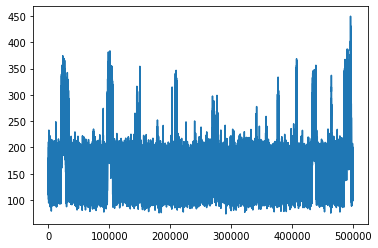

In [30]:
plt.plot(bpsvnp[:, 0, 8])

In [31]:
np.save('bpsvnp.npy', bpsvnp)